In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, t_train), (x_test, t_test)=mnist.load_data()

print('\n train shape = ', x_train.shape, 'train label shape = ', t_train.shape)
print('\n test shape = ', x_test.shape, 'test label shape = ', t_test.shape)

print('\n train label = ', t_train) #학습 데이터 정답 출력
print('\n test label = ', t_test) # 테스트 데이터 정답 출력


 train shape =  (60000, 28, 28) train label shape =  (60000,)

 test shape =  (10000, 28, 28) test label shape =  (10000,)

 train label =  [5 0 4 ... 5 6 8]

 test label =  [7 2 1 ... 4 5 6]


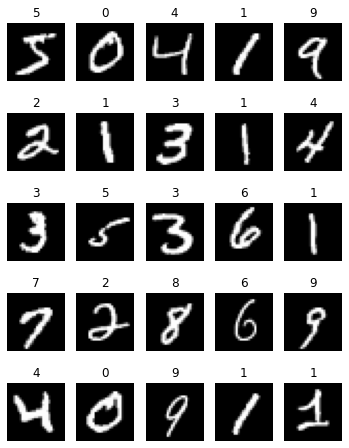

In [3]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6,8))

for index in range(25):
    plt.subplot(5,5,index+1) # 100개를 출력할 때는 10,10으로...
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off')
    plt.title(str(t_train[index]))
plt.show()

In [4]:
print(x_test[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 25

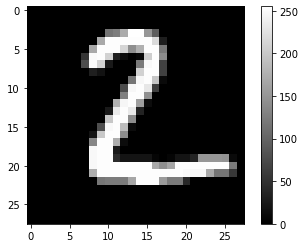

In [5]:
plt.imshow(x_test[1], cmap='gray')
plt.colorbar()
plt.show()

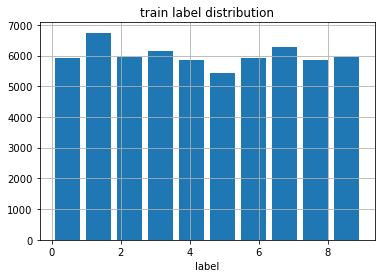

In [6]:
# 어떤 숫자가 몇 개 있는지를 보여줌
plt.title('train label distribution')
plt.grid()
plt.xlabel('label')
plt.hist(t_train, bins=10, rwidth=0.8)
plt.show()

In [7]:
# 학습 데이터 정답 분포 확인
label_distribution=np.zeros(10)

for idx in range(len(t_train)):
    label=int(t_train[idx])
    label_distribution[label] += 1 # label_distribution[label] + 1
    
print(label_distribution)

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]


In [8]:
# 학습 데이터 / 테스트 데이터 정규화 (Normalization)
x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
# 정답 데이터 원핫 인코딩(One-Hot Encoding)
t_train=tf.keras.utils.to_categorical(t_train,num_classes=10) #5:[0,0,0,0,0,1,0,0,0,0]
t_test=tf.keras.utils.to_categorical(t_test,num_classes=10)

In [22]:
#print(x_train[0])
print(t_train[0])
print(t_test[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [11]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(100, activation='relu')) # 음의 값도 표현해줌
model.add(tf.keras.layers.Dense(10, activation='softmax')) #

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             loss='categorical_crossentropy', # categorical : 항목이 3개 이상일 때 여러 카테고리 중 하나 선택
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
hist=model.fit(x_train, t_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3166 - accuracy: 0.9115 - val_loss: 0.1793 - val_accuracy: 0.9486
Epoch 2/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1457 - accuracy: 0.9570 - val_loss: 0.1440 - val_accuracy: 0.9572
Epoch 3/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0998 - accuracy: 0.9700 - val_loss: 0.1208 - val_accuracy: 0.9652
Epoch 4/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0741 - accuracy: 0.9777 - val_loss: 0.1170 - val_accuracy: 0.9659
Epoch 5/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0578 - accuracy: 0.9827 - val_loss: 0.0974 - val_accuracy: 0.9717
Epoch 6/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0452 - accuracy: 0.9865 - val_loss: 0.0944 - val_accuracy: 0.9719
Epoch 7/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0362 - accuracy: 0.9891 - val_loss: 0.0950 - val_accuracy:

In [14]:
model.evaluate(x_test,t_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1193 - accuracy: 0.9783


[0.11929239332675934, 0.9782999753952026]

In [15]:
predictions=model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [16]:
predictions[0]
# 1에 가까운 값을 가진 것이 정답(예시에서는 인덱스 7번 값)

array([6.3603257e-13, 7.3102030e-19, 7.0594980e-12, 7.2509443e-09,
       4.5500467e-21, 7.0217178e-17, 2.6069383e-21, 1.0000000e+00,
       2.2268758e-12, 1.9797314e-10], dtype=float32)

In [17]:
label=np.argmax(predictions[0])
label

7

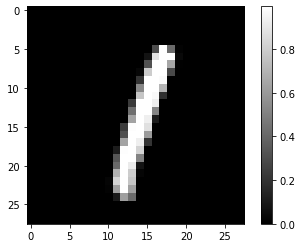

In [18]:
plt.imshow(x_test[5],cmap='gray')
plt.colorbar()
plt.show()

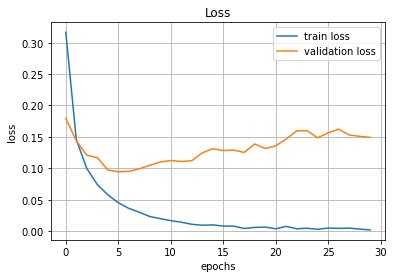

In [19]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='validation loss')

plt.legend(loc='best')
plt.show()
# 그래프의 차이가 큼
# => 훈련 데이터에 과하게 훈련되어 overfitting 됨

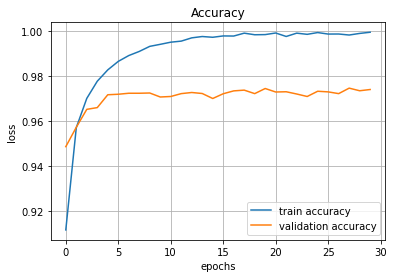

In [20]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')

plt.legend(loc='best')
plt.show()

313/313 [==============================] - 0s 994us/step


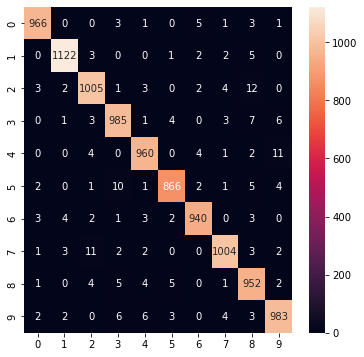

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))

predicted_value=model.predict(x_test)

cm=confusion_matrix(np.argmax(t_test,axis=-1),
                   np.argmax(predicted_value,axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()